In [ ]:
#developed by Roberto Ángel Meléndez-Armenta
#https://www.youtube.com/@educar-ia

#Regresión lineal
#Dataset limones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selección del archivo
from google.colab import files
files.upload()

# Leer archivo seleccionado
data = pd.read_excel('ds_limones.xlsx')
data.head()

Saving ds_limones.xlsx to ds_limones (4).xlsx


,peso,diametro
0,295,27.0
1,274,26.4
2,312,27.0
3,367,29.0
4,187,23.0


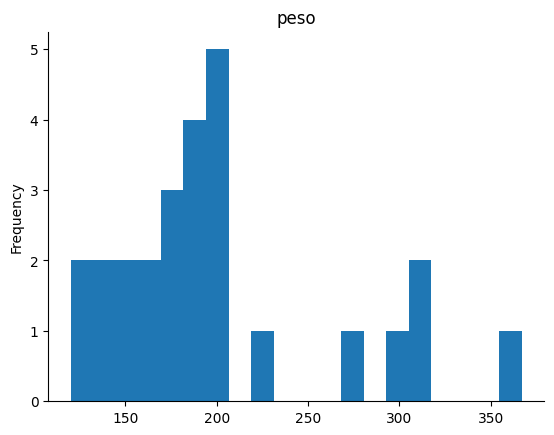

In [ ]:
# Histograma de la variable peso
data['peso'].plot(kind='hist', bins=20, title='peso')
plt.gca().spines[['top', 'right',]].set_visible(False)

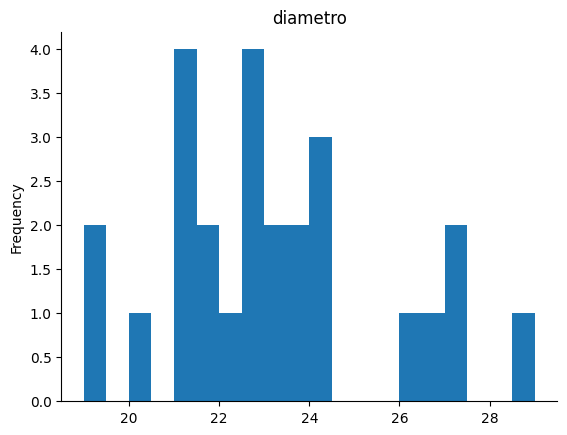

In [ ]:
# Histograma de la variable diametro
data['diametro'].plot(kind='hist', bins=20, title='diametro')
plt.gca().spines[['top', 'right',]].set_visible(False)

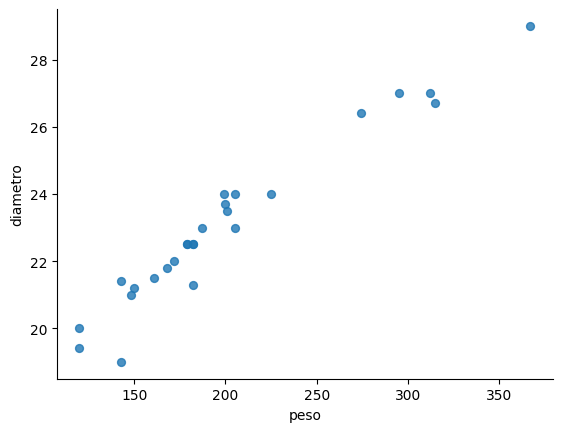

In [ ]:
# Diagrama de dispersión de peso vs diametro
data.plot(kind='scatter', x='peso', y='diametro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Preprocesamiento de Datos
X = data[['peso']].values.reshape(-1, 1)  # Variable independiente (diametro)
y = data['diametro'].values  # Variable dependiente (peso)

In [ ]:
# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Error Cuadrático Medio (MSE): 0.29722428340634255
Coeficiente de Determinación (R²): 0.9119552850931594
Coeficientes: [0.03770693]
Intercepto: 15.520092465963135


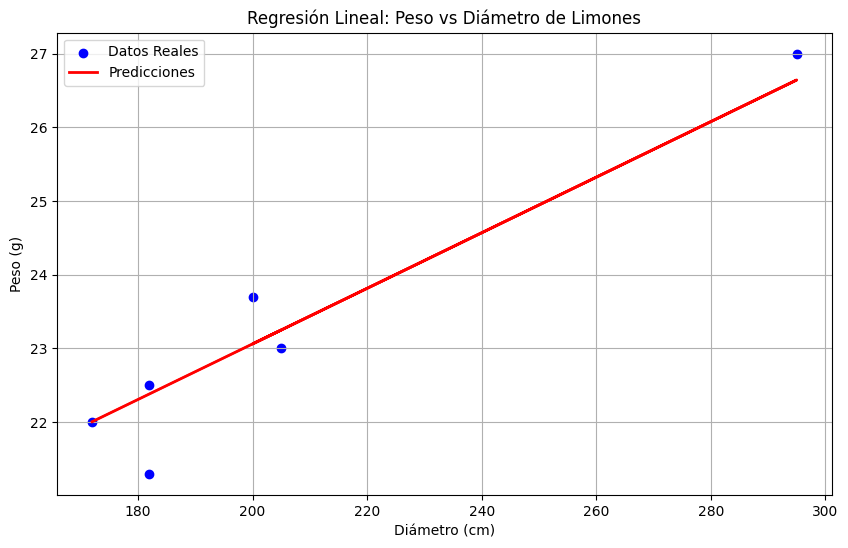

In [ ]:
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

# Visualización de Resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')

# Añadir la línea de regresión ajustada al gráfico
plt.plot(X_test, model.predict(X_test), color='red')

plt.xlabel('Diámetro (cm)')
plt.ylabel('Peso (g)')
plt.title('Regresión Lineal: Peso vs Diámetro de Limones')
plt.legend()
plt.grid(True)
plt.show()